In [1]:
%matplotlib inline
import math
from scratch.probability import normal_cdf, binomial, normal_pdf, inverse_normal_cdf
import matplotlib.pyplot as plt
import seaborn as sns
import random

<Figure size 432x288 with 0 Axes>

# Coin flipping Example

Null hypothesis is default assumption i.e. coin is fair P(Head) = p = 0.5

Alternative hypothesis is p!=5

To find fairness of coin, we will do experiment where we flip coin n=1000 times and assumed p = 0.5. 

Counting the number of heads X is a random variable of Binomial(n,p)

**Note:** We can never accept null hypothesis.  We either reject them or "fail to reject" them. 

### Binomial $\approx$ Normal for large n

In [2]:
n = 1000
p = 0.5
# Output of 20 such experiments
n_exp = 20
#expected number of heads
E_binomial = sum([binomial(n,p) for i in range(n_exp)])/n_exp
print(E_binomial)

502.8


Binomial(n,p) can be approximated using Normal of mu = p*n and sigma = sqrt(p*(p-1)*n)

In [3]:
def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

mu, sigma = normal_approximation_to_binomial(n,p)
mu,sigma

(500.0, 15.811388300841896)

In [4]:
# expected number of heads 
E_normal = inverse_normal_cdf(p,mu,sigma)
E_normal

499.9998492108507

In [5]:
percent_diff = abs(E_binomial - E_normal)*100.0/E_normal
percent_diff

0.5600303267228558

As you can see above E_normal $\approx$ E_binomial when n is large

In [6]:
import pandas

n_list = []
percent_diff_list = []

for n in [10,100,1000,10000,100000]:
    p = 0.5
    # Output of 20 such experiments
    n_exp = 20
    #expected number of heads
    E_binomial = sum([binomial(n,p) for i in range(n_exp)])/n_exp
    
    mu, sigma = normal_approximation_to_binomial(n,p)
    E_normal = inverse_normal_cdf(p,mu,sigma)
    percent_diff = abs(E_binomial - E_normal)*100.0/E_normal
    n_list.append(n)
    percent_diff_list.append(percent_diff)

plot_df = pandas.DataFrame({'n':n_list,'percent_diff':percent_diff_list})
plot_df    

,n,percent_diff
0,10,12.999738
1,100,4.399909
2,1000,0.280030
3,10000,0.028010
4,100000,0.063197


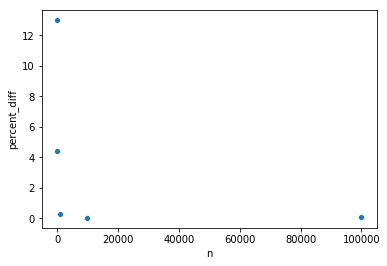

In [7]:
sns.scatterplot(x='n',y='percent_diff',data=plot_df)

## Decision making

* The first step is to state the relevant null and alternative hypotheses.
    * Null hypothesis is p=0.5
    * alternate hypothesis is p$\neq$0.5
* Select a significance level (α), a probability threshold below which the null hypothesis will be rejected. Common values are 5% and 1%.
    * Lets take 5% significance level i.e. 5% type 1 error (false positive error) when we incorrectly reject null hypothesis
    * i.e. We "fail to reject" null hypothesis with 95% confidence
    
**Note:** A "negative" is a decision in favor of the null hypothesis and a "positive" is a decision in favor of the alternative hypothesis.


Hence, type 1 error = incorrectly reject null hypothesis = False positive

where, Reject null hypothesis = "positive" decision in favor of the alternative hypothesis.

Similarly:

type 2 error = incorrectly "fail to reject" null hypothesis = False negative

where, "fail to reject" null hypothesis = decision in favor of the null hypothesis



![Type 1 and Type 2 errors](https://secure-media.collegeboard.org/apc/12538_gra1.gif)

## Significance level of test

In [8]:
# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf
# it's above the threshold if it's not below the threshold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)
# it's between if it's less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)
# it's outside if it's not between
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

In [9]:
def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)
def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)
def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2
    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound

In [10]:
n = 1000
p = 0.5
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
mu_0, sigma_0

(500.0, 15.811388300841896)

In [11]:
# 5% error that coin is fair, hence probability is 0.95
lo, hi= normal_two_sided_bounds(0.95, mu_0, sigma_0)
lo,hi

(469.01026640487555, 530.9897335951244)

if number of heads is in range [lo, hi] then we "fail to reject" H0/"null hypothesis" with 95% confidence or 5% error.

Confidence interval of [lo,hi] for significance of 5%.

Assuming p really equals 0.5 (i.e., H0 is true), there is just a 5% chance we observe an
X that lies outside this interval, which is the exact significance we wanted. Said differently,
if H0 is true, then, approximately 19 times out of 20, this test will give the correct
result.

## Power of test

**Power** of a test, which is the probability of not making a type 2 error, in which we fail to reject H0 even though it’s false.

Power = 1 - $\beta$, where $\beta$ = P(type 2 error)

type 2 error = false negative =  "fail to reject H0" when H0 is False

Since H0 is False let actual p=0.55. Note we had assumed H0 of p=0.5

In [12]:
mu_0, sigma_0 = normal_approximation_to_binomial(n=1000,p=0.5) #since we assumed p=0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
lo,hi

(469.01026640487555, 530.9897335951244)

In [13]:
# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval

"""Probability that number of heads is in range [lo,hi] calculated by assuming p=0.5
but actually p!=0.5, p=0.55 = type_2_probability"""
# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
type_2_probability

0.11345199870463285

In [14]:
power = 1 - type_2_probability
power

0.8865480012953671

## P-value

**P-value:**  P-value is the probability of obtaining results as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.

For our example of H0: p=0.5
Lets assume H0 is true than number of heads should be in confidence interval of [lo,hi] = [469.01, 530.98]
Let observed value is 530

For our two-sided test:

In [15]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is what's greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is what's less than x
        return 2 * normal_probability_below(x, mu, sigma)

"""Why did we use 529.5 instead of 530? This is what’s called a continuity correction. 
It reflects the fact that normal_probability_between(529.5, 530.5, mu_0, sigma_0)"""
two_sided_p_value(529.5, mu_0,sigma_0)

0.06207721579598857

One way to convince yourself that this is a sensible estimate is with a simulation, as shown below

In [16]:
extreme_value_count = 0
for _ in range(100000):
    """
    count # of heads in 1000 flips
    and count how often the # is 'extreme'
    i.e. 
    """
    num_heads = sum(1 if random.random() < 0.5 else 0 for _ in range(1000))
    if num_heads >= 530 or num_heads <= (mu_0-(530-mu_0)):              
        extreme_value_count += 1
    
print(extreme_value_count / 100000) # 0.062

0.06351


Since the p-value is greater than our 5% significance, we don’t reject the null. 

If we instead saw 532 heads, the p-value would be

In [17]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

Which is smaller than the 5% significance, which means we would reject the null. It’s
the exact same test as before. It’s just a different way of approaching the statistics.

# Coin flipping example 2

null hypothesis is coin is not biased toward heads, or that p ≤ 0 . 5. Let significance level is 5%

In [18]:
hi = normal_upper_bound(0.95, mu_0, sigma_0) # 0.95 since significance level is 5%
hi

526.0073585242053

If number of heads if less equal to than 526 we decide in favor of null hypothesis with confidence of 95%. 

In [19]:
#Actually p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
# type_2_probability = incorrectly decide in favour of null hypothesis i.e. Number of heads is less than hi = 526
type_2_probability = normal_probability_below(hi,mu_1, sigma_1)
power = 1 - type_2_probability
power

0.9363794803307173

Coin flipping example 2 is more powerful test

## P-value

This is one sided test hence if observed value is 525 than

In [20]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

p_value = upper_p_value(524.5, mu_0, sigma_0) # 0.061
p_value

0.06062885772582083

# Confidence Intervals

In [22]:
# If we have seen 540 heads
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000) # 0.0158
normal_two_sided_bounds(0.95, mu, sigma) # [0.5091, 0.5709]

(0.5091095927295919, 0.5708904072704082)

# P-hacking

In [23]:
def run_experiment():
    """flip a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

In [24]:
def reject_fairness(experiment):
    """using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

In [27]:
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment 
                    for experiment in experiments
                    if reject_fairness(experiment)])
num_rejections

46

In [28]:
num_rejections*100.0/1000

4.6

# Example: Running an A/B Test

In [29]:
def estimated_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

In [30]:
def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [32]:
z = a_b_test_statistic(1000, 200, 1000, 180)
z

-1.1403464899034472

In [33]:
two_sided_p_value(z)

0.254141976542236

In [34]:
z = a_b_test_statistic(1000, 200, 1000, 150) # -2.94
two_sided_p_value(z)

0.003189699706216853